<a href="https://colab.research.google.com/github/itsus07/UtkarshSingh/blob/main/DMART_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
import datetime as dt
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [ ]:
import yfinance as yf


yf.pdr_override()

# For time stamps
import yfinance as yf

# end date data is excluded
maindf = yf.download('DMART.NS', start='2018-03-12', end='2024-02-11')
maindf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-03-12,1316.099976,1336.699951,1308.099976,1315.650024,1315.650024,524560
2018-03-13,1312.500000,1344.800049,1312.000000,1337.900024,1337.900024,529862
2018-03-14,1336.000000,1363.900024,1327.000000,1345.199951,1345.199951,743796
2018-03-15,1341.000000,1367.000000,1335.000000,1359.800049,1359.800049,630902
2018-03-16,1359.800049,1377.849976,1347.849976,1365.800049,1365.800049,1177277
...,...,...,...,...,...,...
2024-02-05,3785.000000,3791.550049,3720.050049,3729.600098,3729.600098,216052
2024-02-06,3730.000000,3737.699951,3702.050049,3727.399902,3727.399902,148110
2024-02-07,3759.000000,3785.000000,3703.000000,3717.699951,3717.699951,173087


In [ ]:
maindf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,1462.0,2841.217679,1110.714460,1150.000000,1641.250000,2887.400024,3819.962524,5.599000e+03
High,1462.0,2878.553726,1121.217238,1179.000000,1661.662476,2940.324951,3850.000000,5.900000e+03
Low,1462.0,2799.652396,1095.250427,1125.750000,1617.375000,2837.500000,3776.187500,5.180050e+03
Close,1462.0,2836.967307,1105.258671,1133.699951,1647.200012,2885.375000,3819.050049,5.323750e+03
Adj Close,1462.0,2836.967307,1105.258671,1133.699951,1647.200012,2885.375000,3819.050049,5.323750e+03
Volume,1462.0,528051.071135,599142.244788,43896.000000,266269.250000,381234.500000,595747.500000,1.499308e+07


In [ ]:
print(maindf.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [ ]:
df = maindf[['Adj Close']]
print("Shape of close dataframe:", df.shape)

Shape of close dataframe: (1462, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))
print(df.shape)
print(df)

(1462, 1)
[[0.04342432]
 [0.04873452]
 [0.05047672]
 ...
 [0.61669908]
 [0.61988522]
 [0.61705707]]


In [ ]:
training_size=int(len(df)*0.75)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1096, 1)
test_data:  (366, 1)


In [ ]:
print(train_data)

[[0.04342432]
 [0.04873452]
 [0.05047672]
 ...
 [0.76443007]
 [0.78003845]
 [0.77921502]]


In [ ]:
print(test_data)

[[0.79408365]
 [0.77524135]
 [0.74391714]
 [0.74539688]
 [0.75668548]
 [0.76551593]
 [0.78184029]
 [0.78706694]
 [0.81088534]
 [0.81911913]
 [0.82173239]
 [0.82188762]
 [0.81703085]
 [0.78581397]
 [0.78098109]
 [0.77621988]
 [0.79002642]
 [0.80179234]
 [0.79821243]
 [0.8095727 ]
 [0.76224623]
 [0.76712689]
 [0.7674371 ]
 [0.75774757]
 [0.78710283]
 [0.77166144]
 [0.77364228]
 [0.75166172]
 [0.76000284]
 [0.74148275]
 [0.77632721]
 [0.78997864]
 [0.79852265]
 [0.78284271]
 [0.79658959]
 [0.79666114]
 [0.77502658]
 [0.7682963 ]
 [0.7580459 ]
 [0.75713892]
 [0.72069551]
 [0.71733037]
 [0.7241322 ]
 [0.73806995]
 [0.73551624]
 [0.73895305]
 [0.74030145]
 [0.74884546]
 [0.75742536]
 [0.76065916]
 [0.74314149]
 [0.73028959]
 [0.73042093]
 [0.72401287]
 [0.72548061]
 [0.72194848]
 [0.71721104]
 [0.7147051 ]
 [0.70754528]
 [0.69691294]
 [0.6868653 ]
 [0.67194901]
 [0.66273675]
 [0.65598264]
 [0.67338098]
 [0.67327359]
 [0.67644779]
 [0.66126895]
 [0.6620446 ]
 [0.67574375]
 [0.69015883]
 [0.69

In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)


time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (995, 100)
y_train:  (995,)
X_test:  (265, 100)
y_test (265,)


In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (995, 100, 1)
X_test:  (265, 100, 1)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, GRU

In [ ]:
model=Sequential()

model.add(LSTM(32,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(32,return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(32,return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam' , metrics = ["mse" , "mae"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 32)           4352      
                                                                 
 lstm_1 (LSTM)               (None, 100, 32)           8320      
                                                                 
 dropout (Dropout)           (None, 100, 32)           0         
                                                                 
 gru (GRU)                   (None, 100, 32)           6336      
                                                                 
 dropout_1 (Dropout)         (None, 100, 32)           0         
                                                                 
 gru_1 (GRU)                 (None, 100, 32)           6336      
                                                                 
 gru_2 (GRU)                 (None, 32)                6

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
32/32 [==============================] - 14s 83ms/step - loss: 0.0357 - mse: 0.0357 - mae: 0.1297 - val_loss: 0.0018 - val_mse: 0.0018 - val_mae: 0.0327
Epoch 2/200
32/32 [==============================] - 1s 27ms/step - loss: 0.0058 - mse: 0.0058 - mae: 0.0537 - val_loss: 0.0019 - val_mse: 0.0019 - val_mae: 0.0353
Epoch 3/200
32/32 [==============================] - 1s 34ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0472 - val_loss: 0.0014 - val_mse: 0.0014 - val_mae: 0.0303
Epoch 4/200
32/32 [==============================] - 1s 36ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0473 - val_loss: 0.0014 - val_mse: 0.0014 - val_mae: 0.0301
Epoch 5/200
32/32 [==============================] - 1s 24ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0457 - val_loss: 0.0014 - val_mse: 0.0014 - val_mae: 0.0292
Epoch 6/200
32/32 [==============================] - 1s 24ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0457 - val_loss: 0.0014 - val_mse: 0.0014 - val_mae: 0.0292
Epoch 7/200
32/

In [ ]:
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 14ms/step - loss: 1.9544e-04 - mse: 1.9544e-04 - mae: 0.0101


[0.00019543776579666883, 0.00019543776579666883, 0.010100801475346088]

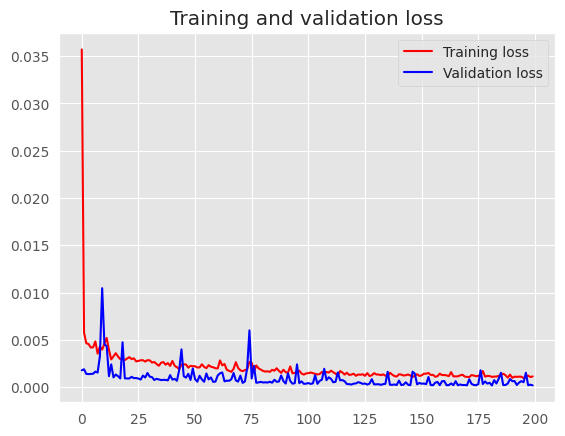

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

9/9 [==============================] - 0s 9ms/step


((995, 1), (265, 1))

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score


# Evaluation metrices RMSE and MAE

print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("-------------------------------------------------------------------------------------")

print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))
print("-------------------------------------------------------------------------------------")

print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))

Train data RMSE:  74.48798898358879
Test data RMSE:  58.5764902865083
-------------------------------------------------------------------------------------
Train data MAE:  52.658403958267904
Test data MAE:  42.32285340507076
-------------------------------------------------------------------------------------
Train data MSE:  5548.460502819245
Test data MSE:  3431.205214285402


In [ ]:
predicted = model.predict(X_test)

9/9 [==============================] - 0s 12ms/step


In [ ]:
from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('R-squared :', metrics.r2_score(y_test, predicted))

Root Mean Squared Error: 0.013979906920324985
R-squared : 0.90768417745771


In [ ]:
predicted_prices = scaler.inverse_transform(predicted.reshape(-1,1))
real_prices =  scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = maindf.index[-len(real_prices): ])
stocks.head()

,Real,Predicted
Date,,
2023-01-12,3872.899902,3874.049072
2023-01-13,3911.800049,3871.644775
2023-01-16,3863.699951,3889.899170
2023-01-17,3678.350098,3864.379150
2023-01-18,3689.800049,3730.170898


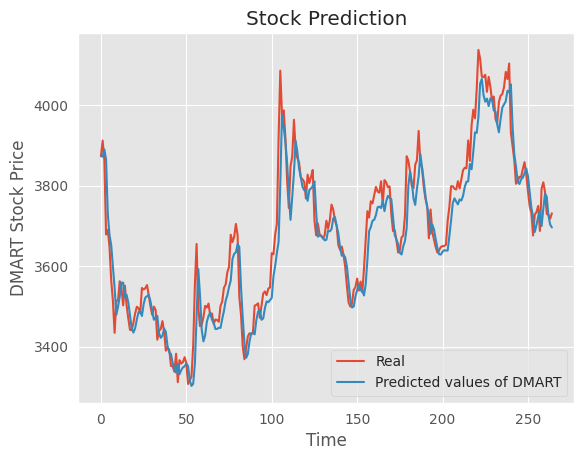

In [ ]:
plt.plot(real_prices, label = 'Real')
plt.plot(predicted_prices, label = 'Predicted values of DMART')

#plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted DMART Stock Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('DMART Stock Price')
plt.legend()
plt.show()